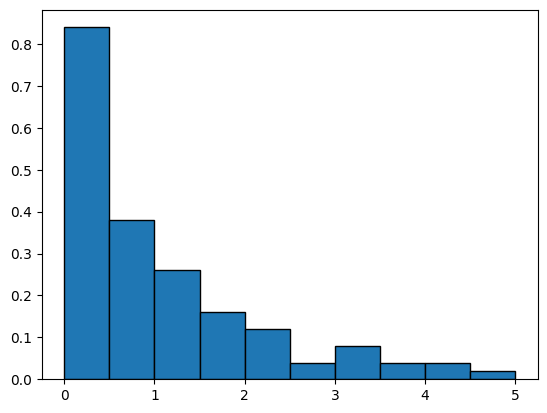

Площадь гистограммы:  1.98
b0 = -0.2587399607325172
b1 = -0.8334635418441255


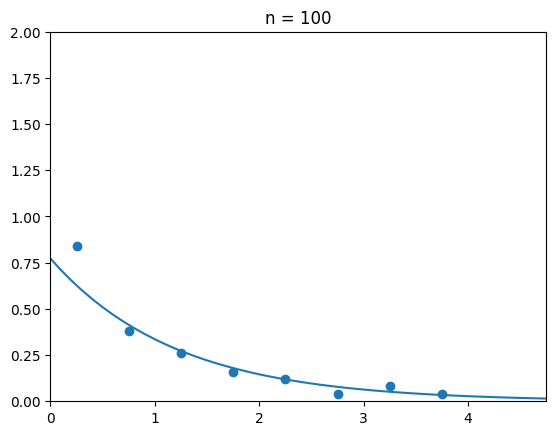

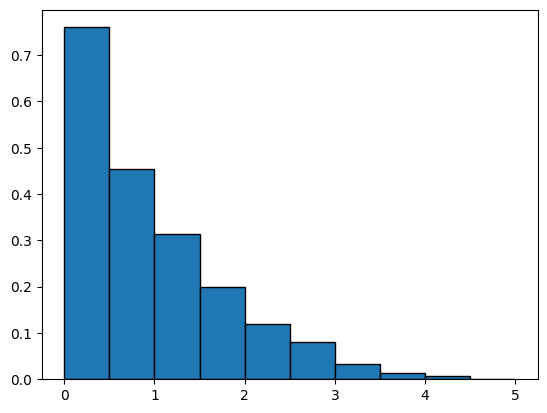

Площадь гистограммы:  1.98
b0 = 0.16346743170561376
b1 = -1.0942441980496207


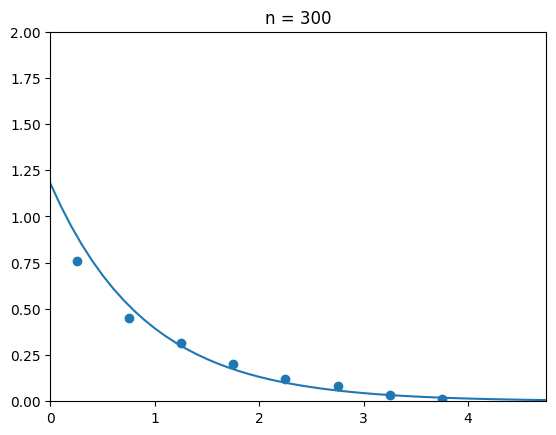

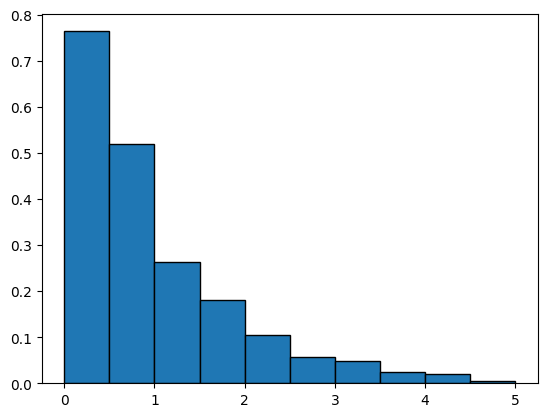

Площадь гистограммы:  1.984
b0 = -0.016784690074216325
b1 = -0.9842165453345304


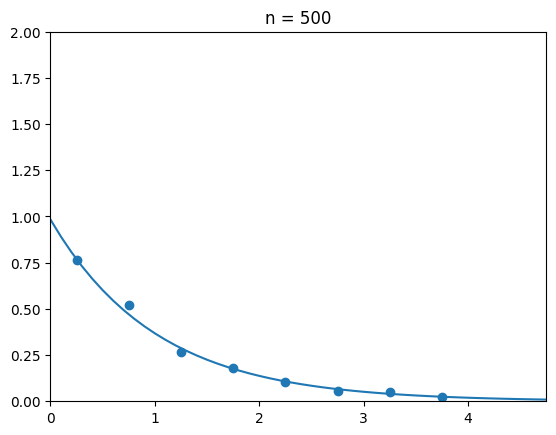

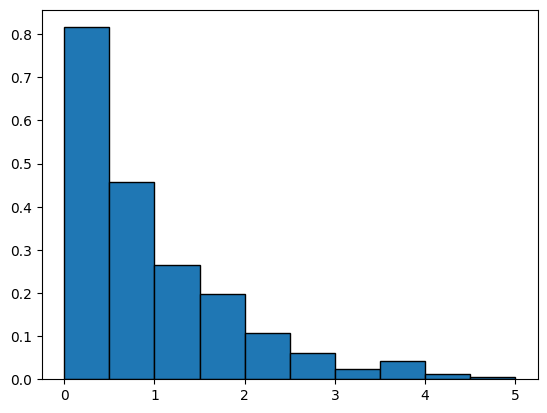

Площадь гистограммы:  1.992
b0 = -0.05132166749719621
b1 = -0.9639645595327737


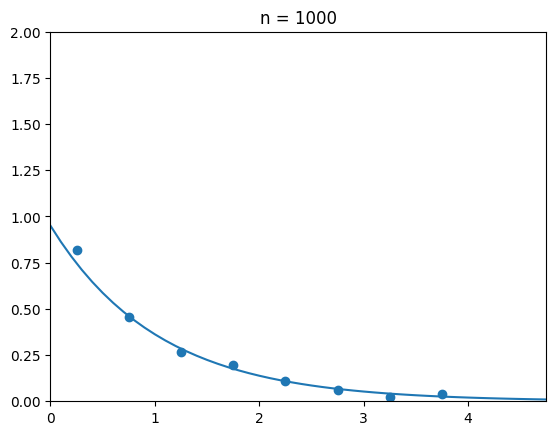

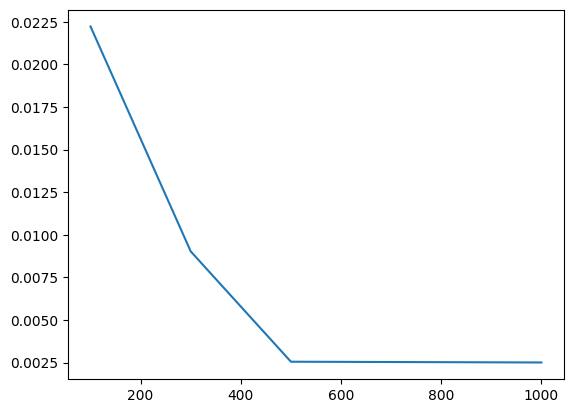

In [3]:
import random
import math
import scipy.stats as sts
import numpy as np
from matplotlib import pyplot as plt


def relative_frequencies(numbers: [int], A, B, areas):
    frequencies = []
    area = (B - A) / areas
    area_borders = [area*i for i in range(areas + 1)]
    counter = 0
    summ = 0
    for i in range(areas):
        for j in numbers:
            if area_borders[i] <= j < area_borders[i+1]:
                counter += 1
                summ += j
        # if counter == 0:
        #     counter += 0.1
        #     print("sdfsdfsdf")
        frequencies.append(counter/(len(numbers) * area))
        counter = 0

    # Задние 2
    plt.bar([i + area/2 for i in area_borders[: -1]], [i for i in frequencies], area, edgecolor="k")
    plt.show()
    S_gist = sum([i for i in frequencies])
    print("Площадь гистограммы: ", S_gist)

    return frequencies, area

errors = []
Ns = [100, 300, 500, 1000]
# Ns = [200 * i + 200 for i in range(10)]
for n in Ns:
    # Задание 1
    # Генерация выборки по эксп. распределнию
    arr = [random.random() for i in range(n)]
    ys = sts.expon.ppf(arr, scale=1)

    # Задание 2
    # Опорные точки
    ys_, area = relative_frequencies(ys, 0, 5, 10)
    ys_er = ys_
    ys_.pop()
    ys_.pop()
    # ys_.pop()
    # ys = []
    # for y in ys_:
    #     if y == 0:
    #         break
    #     ys.append(math.log(y))
    ys = [math.log(y) if y > 0 else math.log(0.00037) for y in ys_]
    xs = [(i * area) + 0.5 * area for i in range(len(ys))]

    # Задание 4
    x2 = sum([x**2 for x in xs])
    xy = sum([xs[i] * ys[i] for i in range(len(xs))])

    b0 = (sum(ys) * x2 - xy * sum(xs)) / (len(xs) * x2 - sum(xs)**2)
    b1 = (sum(ys) * sum(xs) - len(xs) * xy) / (sum(xs)**2 - len(xs) * x2)
    print("b0 = " + str(b0))
    print("b1 = " + str(b1))

    # Задание 5
    def f(x):
        return math.exp(b0 + b1*x)


    plt.scatter(xs, ys_)
    xss = [i / 10 for i in range(100)]
    yss = [f(x) for x in xss]
    plt.plot(xss, yss)
    plt.xlim(0, max(xs) + 1)
    plt.ylim(0, 2)
    plt.title("n = " + str(n))
    plt.show()

    # Задание 7
    # if 0 in ys_:
    #     print("dsadasdasdasd")
    error = math.sqrt(sum((f(xs[i]) - ys_er[i])**2 for i in range(len(ys_er))) / n)
    errors.append(error)

plt.plot(Ns, errors)
plt.show()